<a href="https://colab.research.google.com/github/zeynebyerdelen/Exercise-No.2/blob/main/Exercise_2_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Theoretical Part**

**4. Aufgabe**

LSM-Gewichte (w0, w1, w2):
[-0.76129029  0.66710995  0.89207827]

Entscheidungsgerade:
-0.7613 + (0.6671)*x1 + (0.8921)*x2 = 0


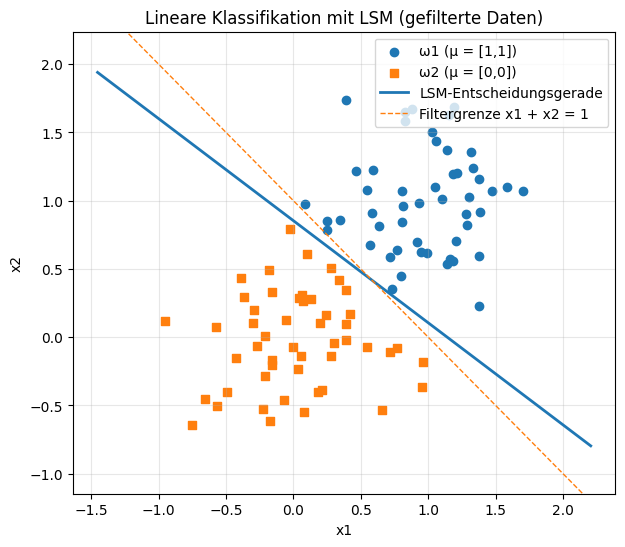

In [4]:
# Aufgabe 4
import numpy as np
import matplotlib.pyplot as plt

# Zufallsgenerator für reproduzierbare Ergebnisse
rng = np.random.default_rng(42)

# -----------------------------
# Schritt 1: Parameter der Normalverteilungen
# -----------------------------
# Mittelwerte der beiden Klassen
mu1 = np.array([1.0, 1.0])   # Klasse ω1
mu2 = np.array([0.0, 0.0])   # Klasse ω2

# Varianzen (σ² = 0.2) für beide Klassen
sigma2_1 = 0.2
sigma2_2 = 0.2
sigma1 = np.sqrt(sigma2_1)
sigma2 = np.sqrt(sigma2_2)

# Hilfsfunktion: Ziehen von Stichproben aus einer 2D-Normalverteilung
def sample_class(mu, sigma, n):
    return rng.normal(loc=mu, scale=sigma, size=(n, 2))

# -----------------------------
# Schritt 2: Daten erzeugen + Filtern
# -----------------------------
# Es werden so lange Punkte gezogen, bis nach dem Filtern
# jeweils 50 Punkte pro Klasse übrig bleiben
def filtered_samples():
    X1, X2 = [], []
    while len(X1) < 50 or len(X2) < 50:
        # Klasse ω1: nur Punkte mit x1 + x2 >= 1 behalten
        if len(X1) < 50:
            x = sample_class(mu1, sigma1, 1)[0]
            if (x[0] + x[1]) >= 1:
                X1.append(x)
        # Klasse ω2: nur Punkte mit x1 + x2 <= 1 behalten
        if len(X2) < 50:
            x = sample_class(mu2, sigma2, 1)[0]
            if (x[0] + x[1]) <= 1:
                X2.append(x)
    return np.array(X1), np.array(X2)

# Gefilterte Stichproben erzeugen
X1, X2 = filtered_samples()

# -----------------------------
# Schritt 3: Datensatz und Labels aufbauen
# -----------------------------
# Zusammenführen der Daten
X = np.vstack([X1, X2])

# Label-Kodierung: ω1 → +1, ω2 → -1
y = np.hstack([np.ones(len(X1)), -np.ones(len(X2))])

# Bias-Term hinzufügen: x -> [1, x1, x2]
Xb = np.c_[np.ones(X.shape[0]), X]

# -----------------------------
# Schritt 4: Linearer Klassifikator mit LSM
# -----------------------------
# Least Squares Lösung (mit Pseudoinverser für numerische Stabilität)
w = np.linalg.pinv(Xb) @ y

w0, w1, w2 = w

print("LSM-Gewichte (w0, w1, w2):")
print(w)

print("\nEntscheidungsgerade:")
print(f"{w0:.4f} + ({w1:.4f})*x1 + ({w2:.4f})*x2 = 0")

# -----------------------------
# Schritt 5: Visualisierung
# -----------------------------
plt.figure(figsize=(7, 6))

# Punktwolken der beiden Klassen
plt.scatter(X1[:, 0], X1[:, 1], marker='o', label='ω1 (μ = [1,1])')
plt.scatter(X2[:, 0], X2[:, 1], marker='s', label='ω2 (μ = [0,0])')

# Entscheidungsgerade des LSM:
# w0 + w1*x1 + w2*x2 = 0  ->  x2 = -(w0 + w1*x1) / w2
x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
xs = np.linspace(x1_min, x1_max, 200)

if abs(w2) > 1e-12:
    ys = -(w0 + w1 * xs) / w2
    plt.plot(xs, ys, linewidth=2, label='LSM-Entscheidungsgerade')
else:
    # Sonderfall: vertikale Gerade
    x_vert = -w0 / w1
    plt.axvline(x_vert, linewidth=2, label='LSM-Entscheidungsgerade')

# Referenzlinie aus dem Filter: x1 + x2 = 1
xs2 = np.linspace(x1_min, x1_max, 200)
plt.plot(xs2, 1 - xs2, linestyle='--', linewidth=1,
         label='Filtergrenze x1 + x2 = 1')

# Plot-Layout
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Lineare Klassifikation mit LSM (gefilterte Daten)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
plt.show()


**5. Aufgabe: Aktivierungsfunktionen**

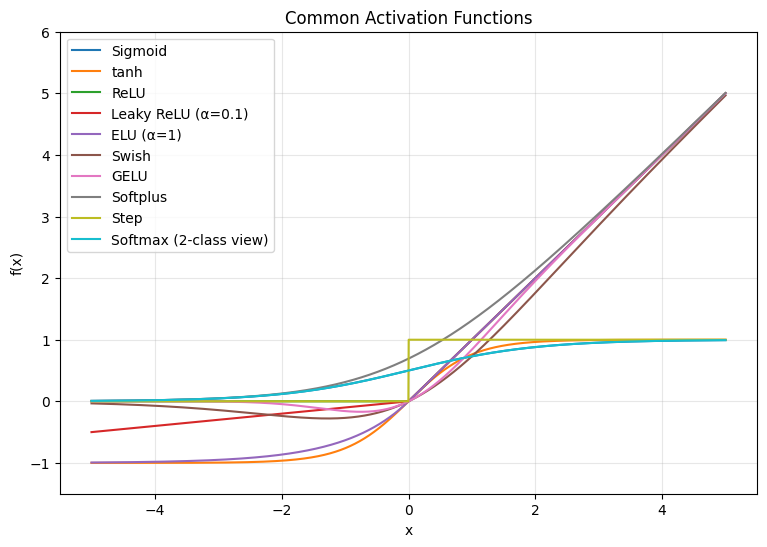

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 2000)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def relu(z):
    return np.maximum(0, z)

def leaky_relu(z, alpha=0.1):
    return np.where(z >= 0, z, alpha * z)

def elu(z, alpha=1.0):
    return np.where(z >= 0, z, alpha * (np.exp(z) - 1))

def softplus(z):
    return np.log1p(np.exp(z))

def swish(z):
    return z * sigmoid(z)

def gelu(z):
    return 0.5 * z * (1 + np.tanh(np.sqrt(2/np.pi) * (z + 0.044715 * z**3)))

def step(z):
    return (z >= 0).astype(float)

# Softmax ist eigentlich für Vektoren; 2-Klassen-Ansicht: softmax([z,0])_0
def softmax_2class(z):
    return np.exp(z) / (np.exp(z) + 1)

plt.figure(figsize=(9, 6))
plt.plot(x, sigmoid(x), label="Sigmoid")
plt.plot(x, tanh(x), label="tanh")
plt.plot(x, relu(x), label="ReLU")
plt.plot(x, leaky_relu(x), label="Leaky ReLU (α=0.1)")
plt.plot(x, elu(x), label="ELU (α=1)")
plt.plot(x, swish(x), label="Swish")
plt.plot(x, gelu(x), label="GELU")
plt.plot(x, softplus(x), label="Softplus")
plt.plot(x, step(x), label="Step")
plt.plot(x, softmax_2class(x), label="Softmax (2-class view)")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Common Activation Functions")
plt.grid(True, alpha=0.3)
plt.ylim(-1.5, 6)
plt.legend()
plt.show()


**Practical part**

**1.Linear classification and Support Vector Machine on a binary dataset**





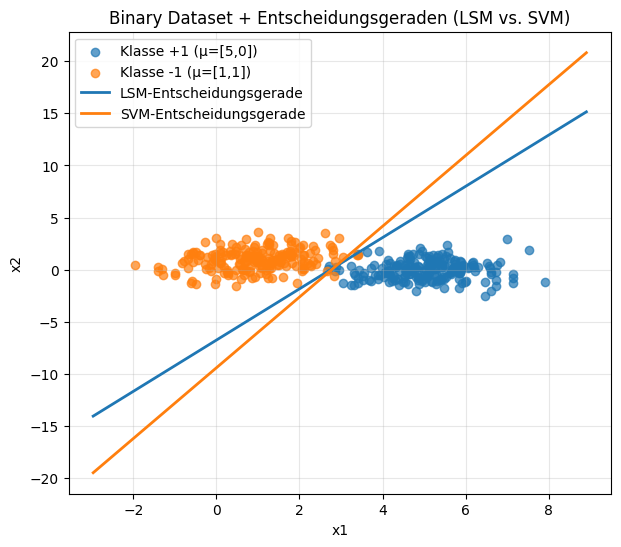

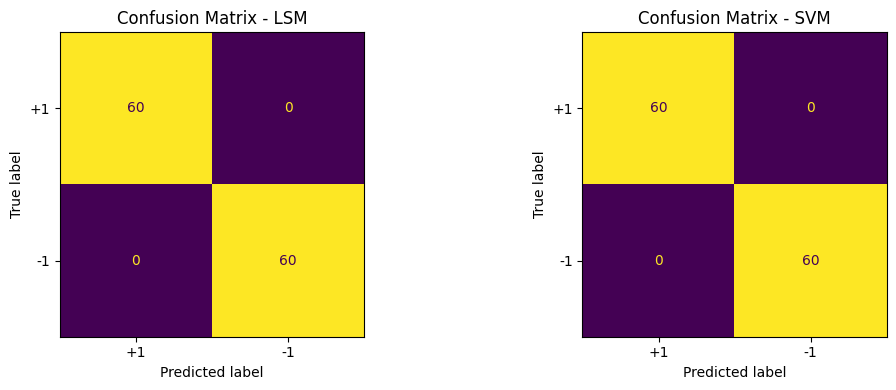

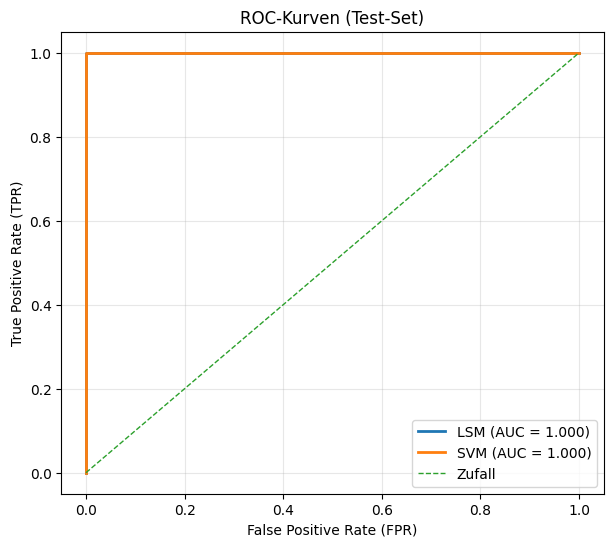

=== LSM ===
w_lsm = [-1.02364082  0.37241825 -0.15141498]
Confusion Matrix (rows true, cols pred) [+1, -1]:
 [[60  0]
 [ 0 60]]
AUC = 1.0

=== SVM ===
w_svm = [ 1.87072933 -0.55102264] b_svm = -5.189724459476279
Confusion Matrix (rows true, cols pred) [+1, -1]:
 [[60  0]
 [ 0 60]]
AUC = 1.0


In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.svm import SVC

# =========================
# 1) Daten erzeugen (2 Klassen)
# =========================
rng = np.random.default_rng(42)
N = 200  # pro Klasse

mu1 = np.array([5.0, 0.0])   # Klasse +1
mu2 = np.array([1.0, 1.0])   # Klasse -1
cov = np.eye(2)              # I

X1 = rng.multivariate_normal(mean=mu1, cov=cov, size=N)
X2 = rng.multivariate_normal(mean=mu2, cov=cov, size=N)

X = np.vstack([X1, X2])
y = np.hstack([np.ones(N), -np.ones(N)])  # +1 für X1, -1 für X2

# Bias-Koordinate anhängen: x0 = 1  -> [1, x1, x2]
Xb = np.c_[np.ones(X.shape[0]), X]

# Train/Test Split
Xb_train, Xb_test, y_train, y_test = train_test_split(
    Xb, y, test_size=0.3, random_state=42, stratify=y
)

# =========================
# 2) LSM trainieren (closed form)
# =========================
# LSM: w = argmin ||Xb w - y||^2
# numerisch stabil: Pseudoinverse
w_lsm = np.linalg.pinv(Xb_train) @ y_train

# Scores (kontinuierlich) für ROC:
scores_lsm = Xb_test @ w_lsm
y_pred_lsm = np.sign(scores_lsm)
y_pred_lsm[y_pred_lsm == 0] = 1

# =========================
# 3) SVM (linear) trainieren
# =========================
# sklearn-SVM nutzt eigenen Intercept, daher ohne Bias-Spalte trainieren
X_train = Xb_train[:, 1:]
X_test = Xb_test[:, 1:]

svm = SVC(kernel="linear")
svm.fit(X_train, y_train)

scores_svm = svm.decision_function(X_test)  # gut für ROC
y_pred_svm = svm.predict(X_test)

# =========================
# 4) Confusion Matrix + ROC + AUC
# =========================
cm_lsm = confusion_matrix(y_test, y_pred_lsm, labels=[1, -1])
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=[1, -1])

# ROC braucht y in {0,1}: positive Klasse = +1
y_test01 = (y_test == 1).astype(int)

fpr_lsm, tpr_lsm, _ = roc_curve(y_test01, scores_lsm)
auc_lsm = auc(fpr_lsm, tpr_lsm)

fpr_svm, tpr_svm, _ = roc_curve(y_test01, scores_svm)
auc_svm = auc(fpr_svm, tpr_svm)

# =========================
# Plot 1: Daten + Entscheidungsgeraden
# =========================
plt.figure(figsize=(7, 6))
plt.scatter(X1[:, 0], X1[:, 1], label="Klasse +1 (μ=[5,0])", alpha=0.7)
plt.scatter(X2[:, 0], X2[:, 1], label="Klasse -1 (μ=[1,1])", alpha=0.7)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
xs = np.linspace(x_min, x_max, 200)

# LSM-Gerade: w0 + w1 x1 + w2 x2 = 0 -> x2 = -(w0 + w1 x1)/w2
w0, w1, w2 = w_lsm
if abs(w2) > 1e-12:
    ys = -(w0 + w1 * xs) / w2
    plt.plot(xs, ys, linewidth=2, label="LSM-Entscheidungsgerade")
else:
    plt.axvline(-w0 / w1, linewidth=2, label="LSM-Entscheidungsgerade")

# SVM-Gerade: w·x + b = 0
wsvm = svm.coef_[0]
bsvm = svm.intercept_[0]
if abs(wsvm[1]) > 1e-12:
    ys_svm = -(bsvm + wsvm[0] * xs) / wsvm[1]
    plt.plot(xs, ys_svm, linewidth=2, label="SVM-Entscheidungsgerade")
else:
    plt.axvline(-bsvm / wsvm[0], linewidth=2, label="SVM-Entscheidungsgerade")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Binary Dataset + Entscheidungsgeraden (LSM vs. SVM)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# =========================
# Plot 2: Confusion Matrices
# =========================
fig, ax = plt.subplots(1, 2, figsize=(11, 4))
ConfusionMatrixDisplay(cm_lsm, display_labels=["+1", "-1"]).plot(ax=ax[0], values_format="d", colorbar=False)
ax[0].set_title("Confusion Matrix - LSM")

ConfusionMatrixDisplay(cm_svm, display_labels=["+1", "-1"]).plot(ax=ax[1], values_format="d", colorbar=False)
ax[1].set_title("Confusion Matrix - SVM")
plt.tight_layout()
plt.show()

# =========================
# Plot 3: ROC-Kurven
# =========================
plt.figure(figsize=(7, 6))
plt.plot(fpr_lsm, tpr_lsm, linewidth=2, label=f"LSM (AUC = {auc_lsm:.3f})")
plt.plot(fpr_svm, tpr_svm, linewidth=2, label=f"SVM (AUC = {auc_svm:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", linewidth=1, label="Zufall")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC-Kurven (Test-Set)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Kurze Textausgabe (fürs Protokoll)
print("=== LSM ===")
print("w_lsm =", w_lsm)
print("Confusion Matrix (rows true, cols pred) [+1, -1]:\n", cm_lsm)
print("AUC =", auc_lsm)

print("\n=== SVM ===")
print("w_svm =", wsvm, "b_svm =", bsvm)
print("Confusion Matrix (rows true, cols pred) [+1, -1]:\n", cm_svm)
print("AUC =", auc_svm)


**2.SVM on multiclass dataset**

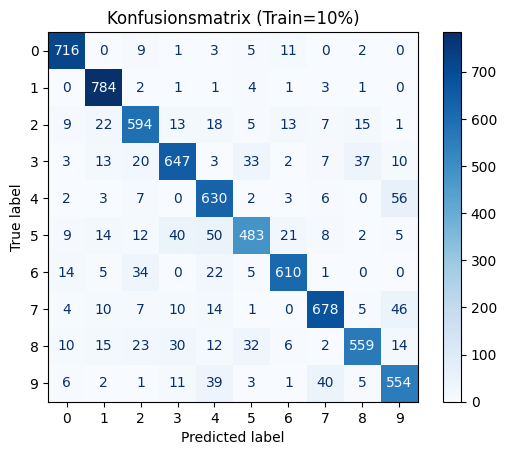

Trainingsanteil=0.1 | ROC-AUC (macro, OvR) = 0.9746


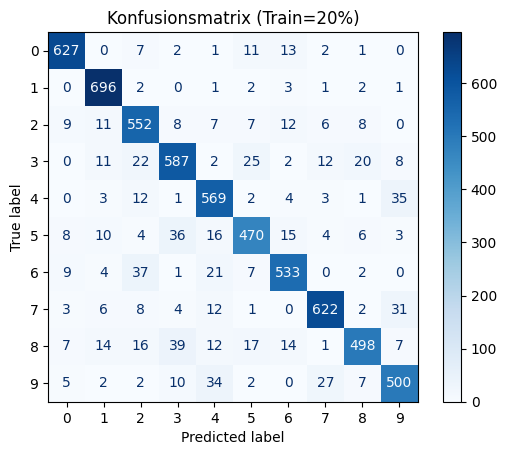

Trainingsanteil=0.2 | ROC-AUC (macro, OvR) = 0.9796


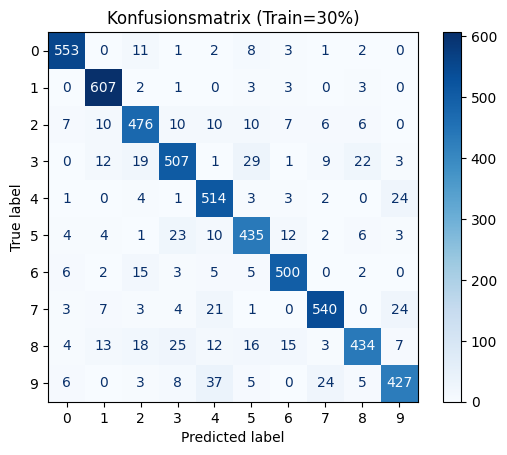

Trainingsanteil=0.3 | ROC-AUC (macro, OvR) = 0.9812


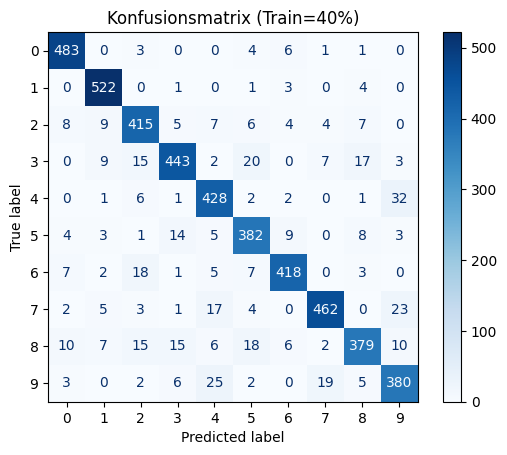

Trainingsanteil=0.4 | ROC-AUC (macro, OvR) = 0.9829


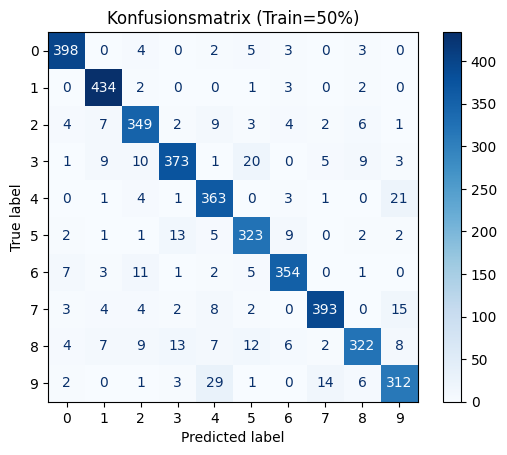

Trainingsanteil=0.5 | ROC-AUC (macro, OvR) = 0.9833


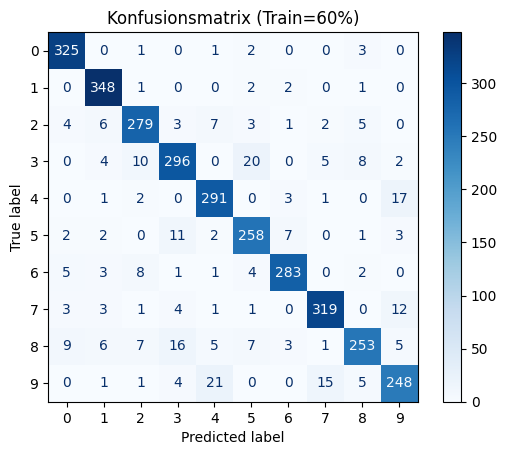

Trainingsanteil=0.6 | ROC-AUC (macro, OvR) = 0.9834


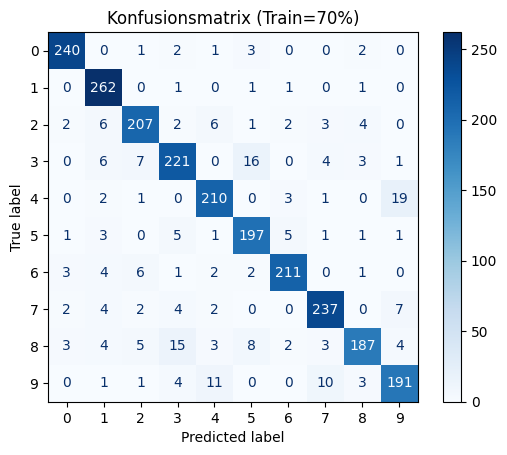

Trainingsanteil=0.7 | ROC-AUC (macro, OvR) = 0.9821


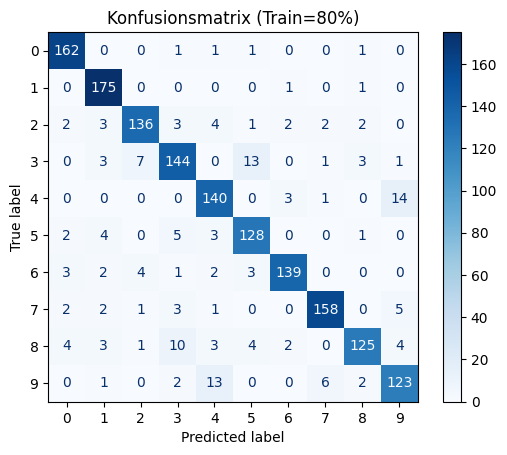

Trainingsanteil=0.8 | ROC-AUC (macro, OvR) = 0.9817


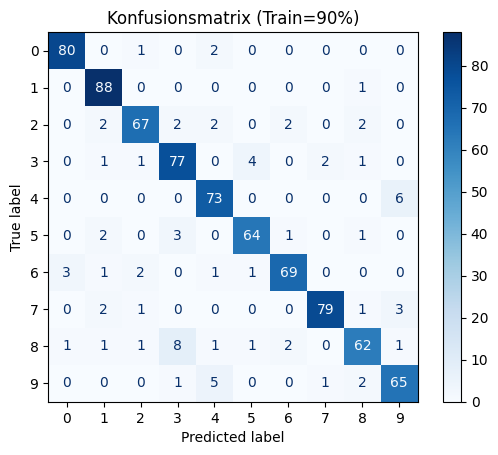

Trainingsanteil=0.9 | ROC-AUC (macro, OvR) = 0.9845


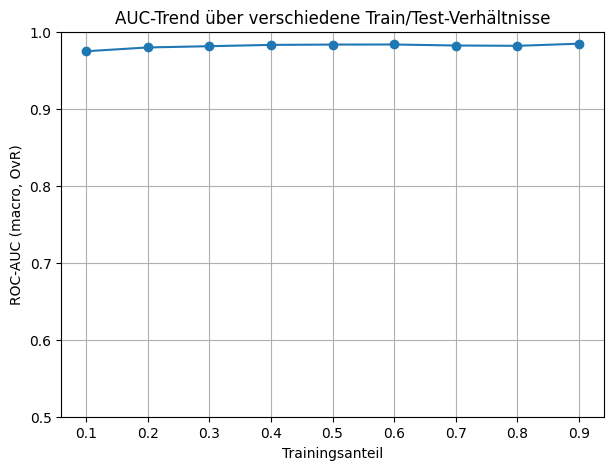

In [19]:
# Zuerst werden alle Werkzeuge importiert, die wir brauchen.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml # Für MNIST
from sklearn.model_selection import train_test_split # Zum Aufteilen der Daten
from sklearn.pipeline import make_pipeline # Super nützlich, um Schritte zu kombinieren
from sklearn.preprocessing import StandardScaler, label_binarize # Für Daten-Normalisierung und AUC-Berechnung
from sklearn.svm import SVC # Der Support Vector Machine Klassifikator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score # Für die Auswertung

# 1. MNIST-Datensatz laden (erfordert eine Internetverbindung)
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X = mnist.data.astype(np.float32)
y = mnist.target.astype(int)

# 2. Einen Teildatensatz verwenden (SVM ist langsam auf dem ganzen Datensatz)
rng = np.random.default_rng(42) # Ein "Zufallszahlengenerator" für reproduzierbare Ergebnisse
subset_size = 8000 # Wir nehmen nur 8000 Bilder, damit es nicht ewig dauert
idx = rng.choice(len(X), size=subset_size, replace=False) # Wähle zufällige Indizes aus
X = X[idx]
y = y[idx]

# Normalisiere die Pixelwerte von [0, 255] auf [0, 1]
X = X / 255.0

# Finde alle einzigartigen Klassen (0, 1, ..., 9)
classes = np.unique(y)

# 3. Modell: Lineare SVM + Standardisierung in einer Pipeline
model = make_pipeline(
    StandardScaler(with_mean=False), # Schritt 1: Standardisiere die Daten
    SVC(kernel="linear", decision_function_shape="ovr") # Schritt 2: Wende eine lineare SVM an
)

# 4. Schleife über die Train/Test-Verhältnisse
train_ratios = np.arange(0.1, 1.0, 0.1) # [0.1, 0.2, ..., 0.9]
auc_values = [] # Leere Liste zum Sammeln der AUC-Werte

for tr in train_ratios:
    # Daten aufteilen
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        train_size=tr, # z.B. 0.1 für 10% Training
        random_state=42, # Für Reproduzierbarkeit
        stratify=y # Super wichtig: Hält die Klassenverteilung in Train und Test gleich!
    )

    # Modell auf den Trainingsdaten trainieren
    model.fit(X_train, y_train)
    # Vorhersagen auf den ungesehenen Testdaten machen
    y_pred = model.predict(X_test)

    # Konfusionsmatrix erstellen und plotten
    cm = confusion_matrix(y_test, y_pred, labels=classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(values_format="d", cmap=plt.cm.Blues) # cmap für schönere Farben
    plt.title(f"Konfusionsmatrix (Train={int(tr*100)}%)")
    plt.show()

    # Mehrklassen-ROC-AUC berechnen
    scores = model.decision_function(X_test) # Hole die "Sicherheits-Scores" für jede Klasse
    y_test_bin = label_binarize(y_test, classes=classes) # Wandle die Test-Labels in ein binäres Format um (One-Hot-Encoding)

    # Berechne den AUC-Score. 'ovr' und 'macro' sind die Schlüsselwörter.
    auc_macro = roc_auc_score(y_test_bin, scores, multi_class="ovr", average="macro")
    auc_values.append(auc_macro)

    print(f"Trainingsanteil={tr:.1f} | ROC-AUC (macro, OvR) = {auc_macro:.4f}")


    # 5. Die AUC-Trendkurve plotten
plt.figure(figsize=(7, 5))
plt.plot(train_ratios, auc_values, marker="o")
plt.xlabel("Trainingsanteil")
plt.ylabel("ROC-AUC (macro, OvR)")
plt.title("AUC-Trend über verschiedene Train/Test-Verhältnisse")
plt.grid(True)
plt.ylim(0.5, 1.0) # y-Achse bei 0.5 starten, da AUC für einen Zufallsklassifikator 0.5 ist
plt.show()

**3.Nonlinear classification and back propagation algorithm**

Starte Training mit Methode Code 1 für 1000 Iterationen...
Iteration 100/1000, MSE: 1.771262, Lernrate: 0.100000
Iteration 200/1000, MSE: 1.970835, Lernrate: 0.100000
Iteration 300/1000, MSE: 1.986202, Lernrate: 0.100000
Iteration 400/1000, MSE: 1.991260, Lernrate: 0.100000
Iteration 500/1000, MSE: 1.993702, Lernrate: 0.100000
Iteration 600/1000, MSE: 1.995120, Lernrate: 0.100000
Iteration 700/1000, MSE: 1.996040, Lernrate: 0.100000
Iteration 800/1000, MSE: 1.996680, Lernrate: 0.100000
Iteration 900/1000, MSE: 1.997150, Lernrate: 0.100000
Iteration 1000/1000, MSE: 1.997509, Lernrate: 0.100000
Starte Training mit Methode Code 2 für 1000 Iterationen...
Iteration 100/1000, MSE: 1.999756, Lernrate: 0.100000
Iteration 200/1000, MSE: 1.999786, Lernrate: 0.100000
Iteration 300/1000, MSE: 1.999809, Lernrate: 0.100000
Iteration 400/1000, MSE: 1.999827, Lernrate: 0.100000
Iteration 500/1000, MSE: 1.999843, Lernrate: 0.100000
Iteration 600/1000, MSE: 1.999856, Lernrate: 0.100000
Iteration 700/100

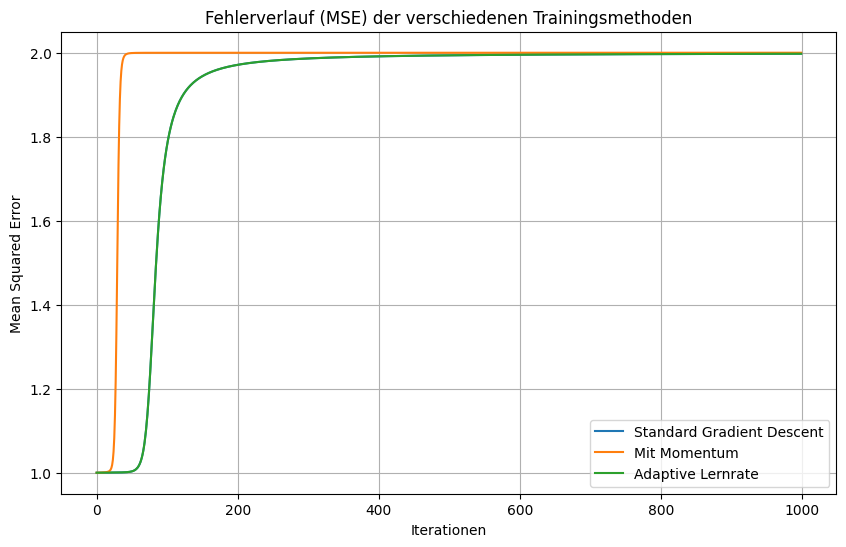

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Wir brauchen die tanh-Funktion und ihre Ableitung.
# Die Ableitung von tanh(x) ist 1 - tanh(x)^2.
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# Die Hauptfunktion, wie im Buch gefordert
def NN_training(X, y, k, code, iter_num, par_vec):
    """
    Trainiert ein zweischichtiges neuronales Netz mit Backpropagation.

    Args:
        X (np.array): Merkmalsmatrix (Merkmale in Zeilen, Samples in Spalten).
        y (np.array): Label-Vektor (1 oder -1).
        k (int): Anzahl der Neuronen in der Hidden Layer.
        code (int): 1 (Standard), 2 (Momentum), 3 (Adaptive LR).
        iter_num (int): Anzahl der Trainings-Iterationen (Epochen).
        par_vec (list): Vektor mit den Parametern [lr, mc, lr_inc, lr_dec, max_perf_inc].
    """

    # Reproduzierbarkeit sicherstellen
    np.random.seed(0)

    # --- Initialisierung ---
    n_features, n_samples = X.shape
    lr, mc, lr_inc, lr_dec, max_perf_inc = par_vec

    # Gewichte zufällig initialisieren
    # Gewichte von Input zu Hidden Layer (k x n_features)
    W1 = np.random.randn(k, n_features) * 0.1
    # Bias für Hidden Layer (k x 1)
    b1 = np.zeros((k, 1))
    # Gewichte von Hidden zu Output Layer (1 x k)
    W2 = np.random.randn(1, k) * 0.1
    # Bias für Output Layer (1 x 1)
    b2 = np.zeros((1, 1))

    # Variablen für Momentum und adaptive LR
    prev_dW1, prev_db1, prev_dW2, prev_db2 = 0, 0, 0, 0

    # Zum Plotten des Fehlers
    mse_history = []

    print(f"Starte Training mit Methode Code {code} für {iter_num} Iterationen...")

    # --- Trainingsschleife ---
    for i in range(iter_num):

        # === 1. Forward Pass ===
        # Von Input zu Hidden Layer
        Z1 = W1 @ X + b1
        A1 = tanh(Z1)
        # Von Hidden zu Output Layer
        Z2 = W2 @ A1 + b2
        A2 = tanh(Z2) # Finale Vorhersage

        # Berechne den Fehler (MSE)
        error = y - A2
        mse = np.mean(error**2)
        mse_history.append(mse)

        # === 2. Backward Pass (Backpropagation) ===
        # Gradient für die Output Layer
        dZ2 = error * tanh_derivative(Z2)
        dW2 = (1/n_samples) * dZ2 @ A1.T
        db2 = (1/n_samples) * np.sum(dZ2, axis=1, keepdims=True)

        # Gradient für die Hidden Layer
        dZ1 = W2.T @ dZ2 * tanh_derivative(Z1)
        dW1 = (1/n_samples) * dZ1 @ X.T
        db1 = (1/n_samples) * np.sum(dZ1, axis=1, keepdims=True)

        # === 3. Gewichts-Update ===
        if code == 1: # Standard Gradient Descent
            W1 -= lr * dW1
            b1 -= lr * db1
            W2 -= lr * dW2
            b2 -= lr * db2

        elif code == 2: # Mit Momentum
            update_W1 = lr * dW1 + mc * prev_dW1
            update_b1 = lr * db1 + mc * prev_db1
            update_W2 = lr * dW2 + mc * prev_dW2
            update_b2 = lr * db2 + mc * prev_db2

            W1 -= update_W1
            b1 -= update_b1
            W2 -= update_W2
            b2 -= update_b2

            prev_dW1, prev_db1, prev_dW2, prev_db2 = update_W1, update_b1, update_W2, update_b2

        elif code == 3: # Mit adaptiver Lernrate
            # Nur eine vereinfachte Logik hier
            if i > 0 and mse < mse_history[i-1]:
                lr *= lr_inc
            elif i > 0 and mse > mse_history[i-1] * max_perf_inc:
                lr *= lr_dec

            W1 -= lr * dW1
            b1 -= lr * db1
            W2 -= lr * dW2
            b2 -= lr * db2

        if (i + 1) % 100 == 0:
            print(f"Iteration {i+1}/{iter_num}, MSE: {mse:.6f}, Lernrate: {lr:.6f}")

    # Gib das trainierte Netzwerk als Dictionary zurück
    net = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'mse_history': mse_history}
    return net

from sklearn.datasets import make_circles

# Testdaten erzeugen (zwei Kreise)
X_raw, y_raw = make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=1)
y_raw = np.where(y_raw == 0, -1, 1) # Labels auf -1 und 1 setzen

# Wichtig: Die Funktion erwartet die Daten transponiert (Merkmale in Zeilen)
X_train_data = X_raw.T
y_train_data = y_raw.reshape(1, -1)

# Parameter für den Test
k_hidden_nodes = 5
iterations = 1000

# --- Experiment 1: Standard Gradient Descent (Code 1) ---
params_gd = [0.1, 0, 0, 0, 0] # lr=0.1
net_gd = NN_training(X_train_data, y_train_data, k_hidden_nodes, 1, iterations, params_gd)

# --- Experiment 2: Mit Momentum (Code 2) ---
params_momentum = [0.1, 0.9, 0, 0, 0] # lr=0.1, mc=0.9
net_momentum = NN_training(X_train_data, y_train_data, k_hidden_nodes, 2, iterations, params_momentum)

# --- Experiment 3: Mit adaptiver Lernrate (Code 3) ---
params_adaptive = [0.1, 0, 1.05, 0.7, 1.04] # lr=0.1, lr_inc=1.05, ...
net_adaptive = NN_training(X_train_data, y_train_data, k_hidden_nodes, 3, iterations, params_adaptive)

# Plot des Fehlerverlaufs zum Vergleich
plt.figure(figsize=(10, 6))
plt.plot(net_gd['mse_history'], label='Standard Gradient Descent')
plt.plot(net_momentum['mse_history'], label='Mit Momentum')
plt.plot(net_adaptive['mse_history'], label='Adaptive Lernrate')
plt.title('Fehlerverlauf (MSE) der verschiedenen Trainingsmethoden')
plt.xlabel('Iterationen')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()